In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np

df_co2 = pd.read_csv("data/CO2.csv") #ppm
df_ch4 = pd.read_csv("data/CH4.csv") #ppb
df_n2o = pd.read_csv("data/N2O.csv") #ppb

df_tmp = pd.read_csv("data/temperature.csv", sep=";")

#### Data preprocessing - gases

In [2]:
# 1. Leave only rows where date is greather than 2000 year
df_co2 = df_co2[(df_co2['year'] > 2000) & (df_co2['year'] < 2023)]
df_ch4 = df_ch4[(df_ch4['year'] > 2000) & (df_ch4['year'] < 2023)]
df_n2o = df_n2o[(df_n2o['year'] > 2000) & (df_n2o['year'] < 2023)]

In [3]:
# 2. Leave only columns with gas concentration and date
df_co2 = df_co2[['year','month','average']]
df_ch4 = df_ch4[['year','month','average']]
df_n2o = df_n2o[['year','month','average']]

In [4]:
# 3. Drop NaN values
df_co2 = df_co2.dropna()
df_ch4 = df_ch4.dropna()
df_n2o = df_n2o.dropna()

In [5]:
# 4. Reset indexing
df_co2 = df_co2.reset_index(drop=True)
df_ch4 = df_ch4.reset_index(drop=True)
df_n2o = df_n2o.reset_index(drop=True)

In [6]:
# 5. Calculate mean of every year
df_co2 = df_co2.groupby('year')['average'].mean().reset_index()
df_ch4 = df_ch4.groupby('year')['average'].mean().reset_index()
df_n2o = df_n2o.groupby('year')['average'].mean().reset_index()

#### Data preprocesing - temperature

In [7]:
# 1. Leave only data from above 2000 year
df_tmp = df_tmp[(df_tmp['Year'] > 2000)]

#### Plots

Text(0.5, 1.0, 'Global temperature- anomaly')

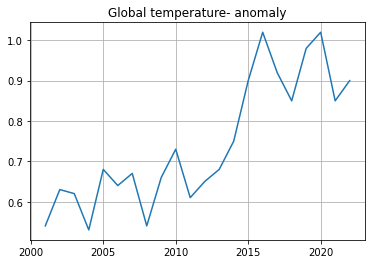

In [9]:
# Temperature
plt.plot(np.array(df_tmp['Year']), np.array(df_tmp['Anomaly']))
plt.grid()
plt.title("Global temperature- anomaly")

Text(0.5, 1.0, 'Global CO2 concatenation in atmosphere')

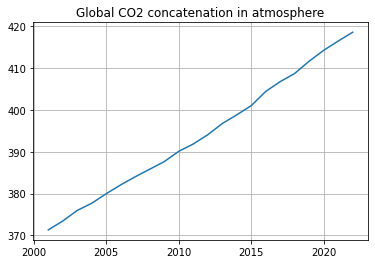

In [11]:
# CO2
plt.plot( np.array(df_co2['year']),np.array(df_co2['average']))
plt.grid()
plt.title("Global CO2 concatenation in atmosphere")

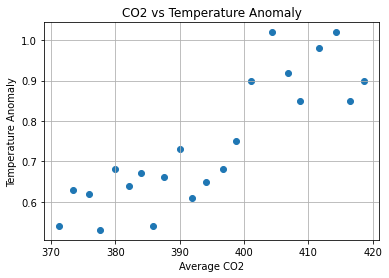

In [12]:
# CO2 vs Temperature Anomaly
plt.scatter(np.array(df_co2['average']), np.array(df_tmp['Anomaly']))
plt.xlabel('Average CO2')
plt.ylabel('Temperature Anomaly')
plt.title('CO2 vs Temperature Anomaly')
plt.grid()
plt.show()

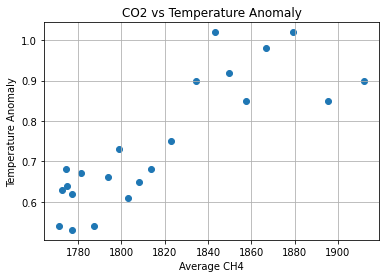

In [13]:
# CH4 vs Temperature Anomaly
plt.scatter(np.array(df_ch4['average']), np.array(df_tmp['Anomaly']))
plt.xlabel('Average CH4')
plt.ylabel('Temperature Anomaly')
plt.title('CO2 vs Temperature Anomaly')
plt.grid()
plt.show()

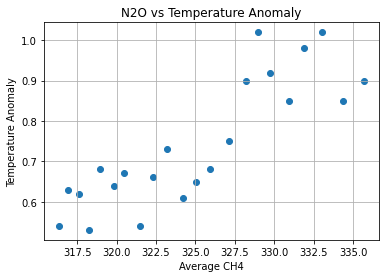

In [14]:
# N2O vs Temperature Anomaly
plt.scatter(np.array(df_n2o['average']), np.array(df_tmp['Anomaly']))
plt.xlabel('Average CH4')
plt.ylabel('Temperature Anomaly')
plt.title('N2O vs Temperature Anomaly')
plt.grid()
plt.show()

#### Save data to csv files

In [16]:
df_n2o.to_csv("data/data_preprocessed/N2O.csv")
df_co2.to_csv("data/data_preprocessed/CO2.csv")
df_ch4.to_csv("data/data_preprocessed/CH4.csv")
df_tmp.to_csv("data/data_preprocessed/temperature.csv")